In [1]:
import pandas as pd
import os
import re
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

os.chdir(r'C:\Users\user\Desktop\전처리 데이터')

In [2]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/H2GTRM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [40]:
os.listdir()

['.RData',
 '.Rhistory',
 'df_analysis(아동청소년).csv',
 'df_analysis_면적.csv',
 'old_school_sgg.xlsx',
 'old_school_umd.xlsx',
 'old_school_umd_원본.xlsx',
 'Preprocessing_sgg.xlsx',
 'Preprocessing_umd.xlsx',
 'test.csv',
 '개발제한구역_활용현황_전처리완료.csv',
 '농기계임대장 현황_시도.csv',
 '농기계임대장 현황_읍면동.csv',
 '시군구_법정코드.xlsx',
 '읍면동_법정코드.xlsx',
 '읍면동_인구수_전처리.xlsx',
 '인구통합',
 '전국농기계임대정보표준데이터.csv',
 '전국농어촌체험휴양마을표준데이터_전처리.csv',
 '전국농어촌체험휴양마을표준데이터_최종.csv',
 '전통시장통계_시군구_최종.csv',
 '폐교데이터_전처리_교육+소득증대.xlsx',
 '폐교데이터_전처리_완성.xlsx',
 '행정_읍면_코드.xlsx']

In [4]:
df = pd.read_csv('전국농기계임대정보표준데이터.csv', encoding='euc-kr')
df.head()

,사업소명,사업소전화번호,소재지도로명주소,소재지지번주소,위도,경도,트랙터및작업기보유대수,경운기및작업기보유대수,관리기및작업기보유대수,땅속작물수확기보유대수,탈곡기및정선작업기보유대수,자주형파종기보유대수,이앙작업기보유대수,벼수확및운반작업기보유대수,기타임대농기계보유정보,관리기관전화번호,관리기관명,데이터기준일자,제공기관코드,제공기관명
0,화성시농기계임대사업소,031-5189-3612,경기도 화성시 팔탄면 버들로 1613,경기도 화성시 팔탄면 매곡리 172-9번지,37.114518,126.879547,80,21,64,28,85,5,5,2,204,031-5189-3612,화성시농업기술센터,2020-05-29,5530000,경기도 화성시
1,농업기계 임대사업장,054-974-0855,경상북도 칠곡군 약목면 동덕로 146,경상북도 칠곡군 약목면 동안리 831,36.039754,128.382295,186,42,29,23,33,7,17,2,161,054-979-8302,칠곡군농업기술센터,2020-06-30,5220000,경상북도 칠곡군
2,강릉시농업기술센터 농업기계임대사업소 본소,033-660-3160,강원도 강릉시 사천면 동해대로3738-17,강원도 강릉시 사천면 미노리 440-1,37.818268,128.854378,157,19,62,30,29,2,10,0,관리장비(57),033-660-3160,강원도 강릉시청,2021-04-23,4200000,강원도 강릉시
3,강릉시농업기술센터 농업기계임대사업소 남부지소,033-640-4850,강원도 강릉시 칠성로 520,강원도 강릉시 유산동 286-3,37.733533,128.913502,47,6,30,12,15,0,0,0,관리장비(62),033-660-3160,강원도 강릉시청,2021-04-23,4200000,강원도 강릉시
4,강릉시농업기술센터 농업기계임대사업소 서부지소,033-660-3519,강원도 강릉시 성산면 공제로 277,강원도 강릉시 성산면 금산리 1044,NaN,NaN,45,2,17,11,28,2,0,0,관리장비(18),033-660-3160,강원도 강릉시청,2021-04-23,4200000,강원도 강릉시


<AxesSubplot:>

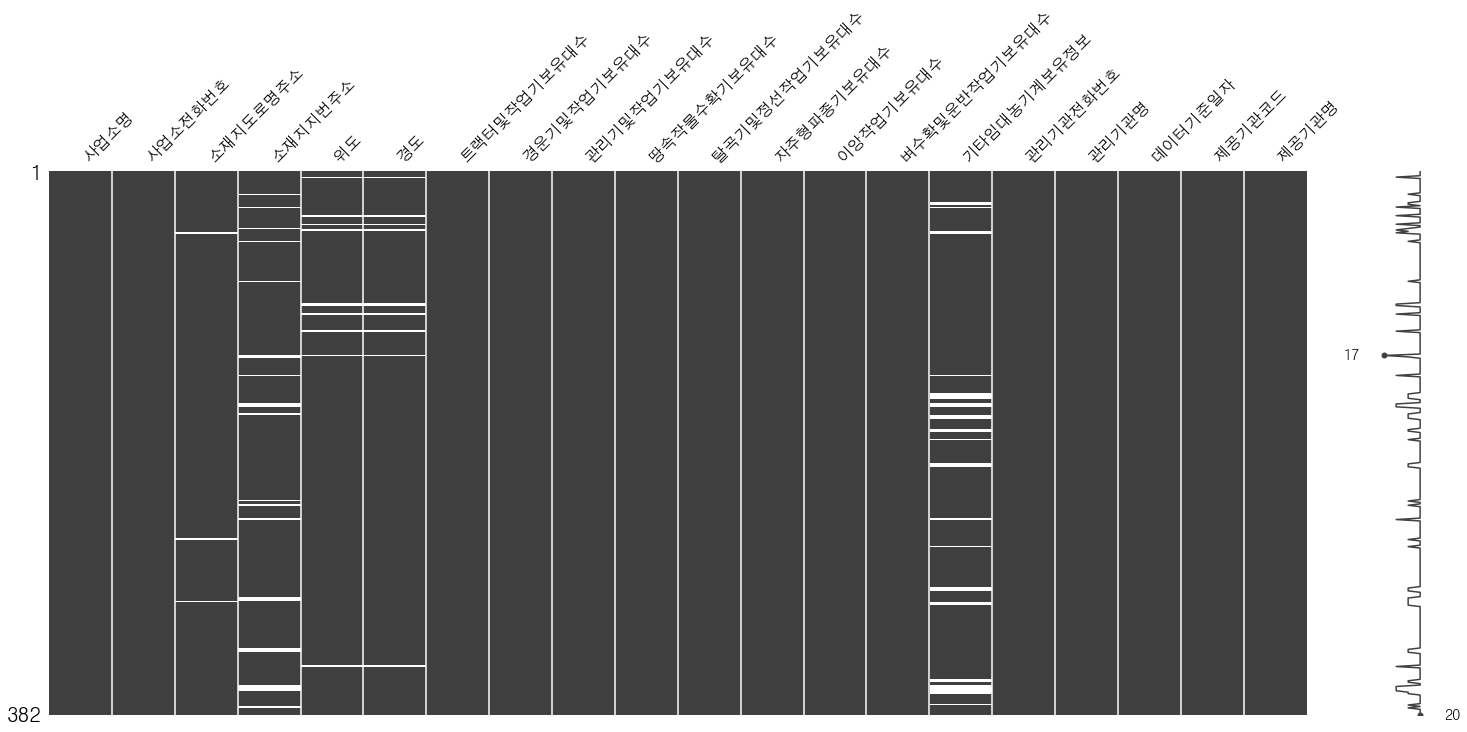

In [5]:
msno.matrix(df)  #선있는부분이 결측치

In [6]:
df['소재지도로명주소'].isna().sum()

3

In [7]:
df['소재지도로명주소'].fillna(df['소재지지번주소'], inplace=True)   #시도정보는 일치하기때문에 결합

In [8]:
df['소재지도로명주소'].str.strip()
df['도'] = df['소재지도로명주소'].str.split(' ', expand=True)[0]
df.head()

,사업소명,사업소전화번호,소재지도로명주소,소재지지번주소,위도,경도,트랙터및작업기보유대수,경운기및작업기보유대수,관리기및작업기보유대수,땅속작물수확기보유대수,...,자주형파종기보유대수,이앙작업기보유대수,벼수확및운반작업기보유대수,기타임대농기계보유정보,관리기관전화번호,관리기관명,데이터기준일자,제공기관코드,제공기관명,도
0,화성시농기계임대사업소,031-5189-3612,경기도 화성시 팔탄면 버들로 1613,경기도 화성시 팔탄면 매곡리 172-9번지,37.114518,126.879547,80,21,64,28,...,5,5,2,204,031-5189-3612,화성시농업기술센터,2020-05-29,5530000,경기도 화성시,경기도
1,농업기계 임대사업장,054-974-0855,경상북도 칠곡군 약목면 동덕로 146,경상북도 칠곡군 약목면 동안리 831,36.039754,128.382295,186,42,29,23,...,7,17,2,161,054-979-8302,칠곡군농업기술센터,2020-06-30,5220000,경상북도 칠곡군,경상북도
2,강릉시농업기술센터 농업기계임대사업소 본소,033-660-3160,강원도 강릉시 사천면 동해대로3738-17,강원도 강릉시 사천면 미노리 440-1,37.818268,128.854378,157,19,62,30,...,2,10,0,관리장비(57),033-660-3160,강원도 강릉시청,2021-04-23,4200000,강원도 강릉시,강원도
3,강릉시농업기술센터 농업기계임대사업소 남부지소,033-640-4850,강원도 강릉시 칠성로 520,강원도 강릉시 유산동 286-3,37.733533,128.913502,47,6,30,12,...,0,0,0,관리장비(62),033-660-3160,강원도 강릉시청,2021-04-23,4200000,강원도 강릉시,강원도
4,강릉시농업기술센터 농업기계임대사업소 서부지소,033-660-3519,강원도 강릉시 성산면 공제로 277,강원도 강릉시 성산면 금산리 1044,NaN,NaN,45,2,17,11,...,2,0,0,관리장비(18),033-660-3160,강원도 강릉시청,2021-04-23,4200000,강원도 강릉시,강원도


In [9]:
df['소재지도로명주소'].str.strip()
df['시도'] = df['소재지도로명주소'].str.split(' ', expand=True)[1]
df.head()

,사업소명,사업소전화번호,소재지도로명주소,소재지지번주소,위도,경도,트랙터및작업기보유대수,경운기및작업기보유대수,관리기및작업기보유대수,땅속작물수확기보유대수,...,이앙작업기보유대수,벼수확및운반작업기보유대수,기타임대농기계보유정보,관리기관전화번호,관리기관명,데이터기준일자,제공기관코드,제공기관명,도,시도
0,화성시농기계임대사업소,031-5189-3612,경기도 화성시 팔탄면 버들로 1613,경기도 화성시 팔탄면 매곡리 172-9번지,37.114518,126.879547,80,21,64,28,...,5,2,204,031-5189-3612,화성시농업기술센터,2020-05-29,5530000,경기도 화성시,경기도,화성시
1,농업기계 임대사업장,054-974-0855,경상북도 칠곡군 약목면 동덕로 146,경상북도 칠곡군 약목면 동안리 831,36.039754,128.382295,186,42,29,23,...,17,2,161,054-979-8302,칠곡군농업기술센터,2020-06-30,5220000,경상북도 칠곡군,경상북도,칠곡군
2,강릉시농업기술센터 농업기계임대사업소 본소,033-660-3160,강원도 강릉시 사천면 동해대로3738-17,강원도 강릉시 사천면 미노리 440-1,37.818268,128.854378,157,19,62,30,...,10,0,관리장비(57),033-660-3160,강원도 강릉시청,2021-04-23,4200000,강원도 강릉시,강원도,강릉시
3,강릉시농업기술센터 농업기계임대사업소 남부지소,033-640-4850,강원도 강릉시 칠성로 520,강원도 강릉시 유산동 286-3,37.733533,128.913502,47,6,30,12,...,0,0,관리장비(62),033-660-3160,강원도 강릉시청,2021-04-23,4200000,강원도 강릉시,강원도,강릉시
4,강릉시농업기술센터 농업기계임대사업소 서부지소,033-660-3519,강원도 강릉시 성산면 공제로 277,강원도 강릉시 성산면 금산리 1044,NaN,NaN,45,2,17,11,...,0,0,관리장비(18),033-660-3160,강원도 강릉시청,2021-04-23,4200000,강원도 강릉시,강원도,강릉시


In [10]:
df['소재지도로명주소'].str.strip()
df['읍면동'] = df['소재지도로명주소'].str.split(' ', expand=True)[2]
df.head()

,사업소명,사업소전화번호,소재지도로명주소,소재지지번주소,위도,경도,트랙터및작업기보유대수,경운기및작업기보유대수,관리기및작업기보유대수,땅속작물수확기보유대수,...,벼수확및운반작업기보유대수,기타임대농기계보유정보,관리기관전화번호,관리기관명,데이터기준일자,제공기관코드,제공기관명,도,시도,읍면동
0,화성시농기계임대사업소,031-5189-3612,경기도 화성시 팔탄면 버들로 1613,경기도 화성시 팔탄면 매곡리 172-9번지,37.114518,126.879547,80,21,64,28,...,2,204,031-5189-3612,화성시농업기술센터,2020-05-29,5530000,경기도 화성시,경기도,화성시,팔탄면
1,농업기계 임대사업장,054-974-0855,경상북도 칠곡군 약목면 동덕로 146,경상북도 칠곡군 약목면 동안리 831,36.039754,128.382295,186,42,29,23,...,2,161,054-979-8302,칠곡군농업기술센터,2020-06-30,5220000,경상북도 칠곡군,경상북도,칠곡군,약목면
2,강릉시농업기술센터 농업기계임대사업소 본소,033-660-3160,강원도 강릉시 사천면 동해대로3738-17,강원도 강릉시 사천면 미노리 440-1,37.818268,128.854378,157,19,62,30,...,0,관리장비(57),033-660-3160,강원도 강릉시청,2021-04-23,4200000,강원도 강릉시,강원도,강릉시,사천면
3,강릉시농업기술센터 농업기계임대사업소 남부지소,033-640-4850,강원도 강릉시 칠성로 520,강원도 강릉시 유산동 286-3,37.733533,128.913502,47,6,30,12,...,0,관리장비(62),033-660-3160,강원도 강릉시청,2021-04-23,4200000,강원도 강릉시,강원도,강릉시,칠성로
4,강릉시농업기술센터 농업기계임대사업소 서부지소,033-660-3519,강원도 강릉시 성산면 공제로 277,강원도 강릉시 성산면 금산리 1044,NaN,NaN,45,2,17,11,...,0,관리장비(18),033-660-3160,강원도 강릉시청,2021-04-23,4200000,강원도 강릉시,강원도,강릉시,성산면


In [11]:
df.columns

Index(['사업소명', '사업소전화번호', '소재지도로명주소', '소재지지번주소', '위도', '경도', '트랙터및작업기보유대수',
       '경운기및작업기보유대수', '관리기및작업기보유대수', '땅속작물수확기보유대수', '탈곡기및정선작업기보유대수',
       '자주형파종기보유대수', '이앙작업기보유대수', '벼수확및운반작업기보유대수', '기타임대농기계보유정보', '관리기관전화번호',
       '관리기관명', '데이터기준일자', '제공기관코드', '제공기관명', '도', '시도', '읍면동'],
      dtype='object')

In [12]:
df['시도군'] = df['도'] + ' ' + df['시도']
df.head()

,사업소명,사업소전화번호,소재지도로명주소,소재지지번주소,위도,경도,트랙터및작업기보유대수,경운기및작업기보유대수,관리기및작업기보유대수,땅속작물수확기보유대수,...,기타임대농기계보유정보,관리기관전화번호,관리기관명,데이터기준일자,제공기관코드,제공기관명,도,시도,읍면동,시도군
0,화성시농기계임대사업소,031-5189-3612,경기도 화성시 팔탄면 버들로 1613,경기도 화성시 팔탄면 매곡리 172-9번지,37.114518,126.879547,80,21,64,28,...,204,031-5189-3612,화성시농업기술센터,2020-05-29,5530000,경기도 화성시,경기도,화성시,팔탄면,경기도 화성시
1,농업기계 임대사업장,054-974-0855,경상북도 칠곡군 약목면 동덕로 146,경상북도 칠곡군 약목면 동안리 831,36.039754,128.382295,186,42,29,23,...,161,054-979-8302,칠곡군농업기술센터,2020-06-30,5220000,경상북도 칠곡군,경상북도,칠곡군,약목면,경상북도 칠곡군
2,강릉시농업기술센터 농업기계임대사업소 본소,033-660-3160,강원도 강릉시 사천면 동해대로3738-17,강원도 강릉시 사천면 미노리 440-1,37.818268,128.854378,157,19,62,30,...,관리장비(57),033-660-3160,강원도 강릉시청,2021-04-23,4200000,강원도 강릉시,강원도,강릉시,사천면,강원도 강릉시
3,강릉시농업기술센터 농업기계임대사업소 남부지소,033-640-4850,강원도 강릉시 칠성로 520,강원도 강릉시 유산동 286-3,37.733533,128.913502,47,6,30,12,...,관리장비(62),033-660-3160,강원도 강릉시청,2021-04-23,4200000,강원도 강릉시,강원도,강릉시,칠성로,강원도 강릉시
4,강릉시농업기술센터 농업기계임대사업소 서부지소,033-660-3519,강원도 강릉시 성산면 공제로 277,강원도 강릉시 성산면 금산리 1044,NaN,NaN,45,2,17,11,...,관리장비(18),033-660-3160,강원도 강릉시청,2021-04-23,4200000,강원도 강릉시,강원도,강릉시,성산면,강원도 강릉시


In [13]:
df_nonggigea = df['시도군'].value_counts()
df_nonggigea

전라남도 신안군    13
강원도 춘천시     10
경상남도 함양군     7
전라남도 나주시     7
전라북도 장수군     7
            ..
충청남도 서천군     1
강원도 영월군      1
전라남도 장흥군     1
경기도 용인시      1
경기도 남양주시     1
Name: 시도군, Length: 146, dtype: int64

In [ ]:
df_nonggigea.to_csv('농기계임대장 현황.csv', encoding='euc-kr')

## 코드매핑

In [43]:
code = pd.read_excel('시군구_법정코드.xlsx')
code.head()

,법정동코드_시군구,법정동명_시군구
0,1111000000,서울특별시 종로구
1,1114000000,서울특별시 중구
2,1117000000,서울특별시 용산구
3,1120000000,서울특별시 성동구
4,1121500000,서울특별시 광진구


In [45]:
df = pd.read_csv('농기계임대장 현황_시도.csv', encoding='euc-kr')
df

,시도명,시도군
0,전라남도 신안군,13
1,강원도 춘천시,10
2,경상남도 함양군,7
3,전라북도 장수군,7
4,인천광역시 옹진군,7
...,...,...
141,경기도 양주시,1
142,광주광역시 북구,1
143,전라남도 고흥군,1
144,경상남도 밀양시,1


In [51]:
df_merged = pd.merge(df, code, left_on='시도명', right_on='법정동명_시군구', how='left')
df_merged

,시도명,시도군,법정동코드_시군구,법정동명_시군구
0,전라남도 신안군,13,4.691000e+09,전라남도 신안군
1,강원도 춘천시,10,4.211000e+09,강원도 춘천시
2,경상남도 함양군,7,4.887000e+09,경상남도 함양군
3,전라북도 장수군,7,4.574000e+09,전라북도 장수군
4,인천광역시 옹진군,7,2.872000e+09,인천광역시 옹진군
...,...,...,...,...
141,경기도 양주시,1,4.163000e+09,경기도 양주시
142,광주광역시 북구,1,2.917000e+09,광주광역시 북구
143,전라남도 고흥군,1,4.677000e+09,전라남도 고흥군
144,경상남도 밀양시,1,4.827000e+09,경상남도 밀양시


In [53]:
df_merged.head()

,시도명,시도군,법정동코드_시군구,법정동명_시군구
0,전라남도 신안군,13,4.691000e+09,전라남도 신안군
1,강원도 춘천시,10,4.211000e+09,강원도 춘천시
2,경상남도 함양군,7,4.887000e+09,경상남도 함양군
3,전라북도 장수군,7,4.574000e+09,전라북도 장수군
4,인천광역시 옹진군,7,2.872000e+09,인천광역시 옹진군


In [56]:
df_merged.to_csv('농기계임대장 현황_시도_코드.csv', encoding='euc-kr', index=False)

In [61]:
df = pd.read_csv('농기계임대장 현황_시도_최종.csv', encoding='euc-kr')

In [62]:
df.head()

,법정동코드_시군구,시도명,시도군
0,4691000000,전라남도 신안군,13
1,4211000000,강원도 춘천시,10
2,4887000000,경상남도 함양군,7
3,4574000000,전라북도 장수군,7
4,2872000000,인천광역시 옹진군,7


In [63]:
df['법정동코드_시군구'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
141    False
142    False
143    False
144    False
145    False
Name: 법정동코드_시군구, Length: 146, dtype: bool

In [64]:
df.head()

,법정동코드_시군구,시도명,시도군
0,4691000000,전라남도 신안군,13
1,4211000000,강원도 춘천시,10
2,4887000000,경상남도 함양군,7
3,4574000000,전라북도 장수군,7
4,2872000000,인천광역시 옹진군,7
